In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [3]:
def integrar_trapecio(f, a, b, n):
    trapecio = lambda f, a, b: (b - a)/2 * (f(a) + f(b))
    h = (b - a) / n
    i = [trapecio(f, a_, a_ + h) for a_ in np.linspace(a, b, n, endpoint=False)]
    return sum(i)

def integrar_precision(f, a, b, p, f_int, f_r, n=1, step=10):
    i0 = f_int(f, a, b, n)
    i1 = f_int(f, a, b, n+1)
    if (abs(i0 - i1) > p):
        return integrar_precision(f, a, b, p, f_int, f_r, n=n*step)
    f_r(f, a, b, n)
    return i0

In [4]:
def representar_integral(f, a, b, n):
    fig, ax = plt.subplots()
    h = (b - a) / n

    # Función
    x = np.linspace(a, b, 100)
    ax.plot(x, f(x), color="royalblue")
    
    # Trapecios
    colors = ("lavender", "oldlace")
    i = 0
    for a_ in np.linspace(a, b, n, endpoint=False):
        trapecio = Polygon([(a_, 0), (a_, f(a_)), (a_ + h, f(a_ + h)), (a_ + h, 0)], facecolor=colors[i%2], edgecolor='0.5')
        ax.add_patch(trapecio)
        i += 1

1.5087115814062484

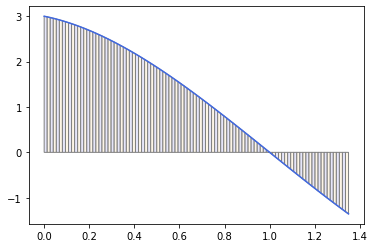

In [5]:
f = lambda x: x**3 - 3*x**2 - x + 3
integrar_precision(f, 0, 1.35, 1e-5, integrar_trapecio, representar_integral)

In [6]:
def integrar_simpson_comp(f, a, b, n):
    h = (b-a)/(2*n)
    i0 = (h/3) * (f(a) + f(b))
    i1 = ((2*h)/3) * sum([f(a + (2*k)*h) for k in range(1, n)])
    i2 = ((4*h)/3) * sum([f(a + (2*k-1)*h) for k in range(1, n+1)])
    return (i0 + i1 + i2)

In [7]:
def representar_integral_simpson(f, a, b, n):
    fig, ax = plt.subplots()
    h = (b - a) / n

    # Función
    x = np.linspace(a, b, 100)
    ax.plot(x, f(x), color="royalblue")

    # Polinomio Simpson
    S = lambda x1, x2, x3, x: f(x1) * (((x-x2)*(x-x3)) / ((x1-x2)*(x1-x3))) + f(x2) * (((x-x1)*(x-x3)) / ((x2-x1)*(x2-x3))) + f(x3) * (((x-x1)*(x-x2)) / ((x3-x1)*(x3-x2)))

    # Trapecios
    colors = ("lavender", "oldlace")
    i = 0
    for a_ in np.linspace(a, b, n, endpoint=False):
        b_ = a_ + h
        c_ = (b_ + a_) / 2
        m = 5
        curva_x = np.linspace(a_, b_, m)
        curva_y = S(a_, b_, c_, curva_x)
        curva = [(a_, 0)] + [(curva_x[i], curva_y[i]) for i in range(m)] + [(b_, 0)]
        poly = Polygon(curva, facecolor=colors[i%2], edgecolor='0.5')
        ax.add_patch(poly)
        i += 1

In [8]:
def integral_recurrencia(i, n, a):
    if (n < a):
        return integral_recurrencia(np.e - (n+1) * i, n+1, a)
    return i

a = 0, i = 1.71828
a = 0, r = 1.71828
a = 1, i = 1.00001
a = 1, r = 1.00000
a = 2, i = 0.71828
a = 2, r = 0.71828
a = 3, i = 0.56344
a = 3, r = 0.56344
a = 4, i = 0.46454
a = 4, r = 0.46454
a = 5, i = 0.39560
a = 5, r = 0.39560
a = 6, i = 0.34468
a = 6, r = 0.34468


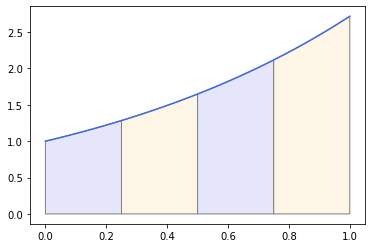

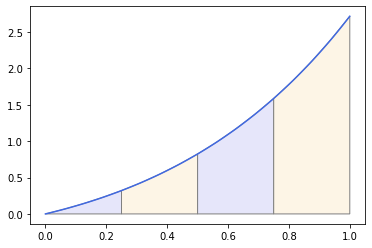

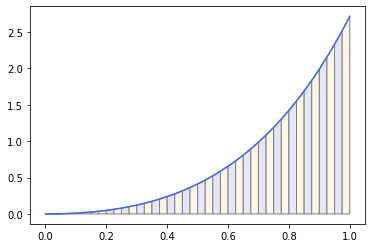

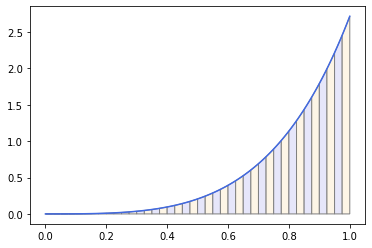

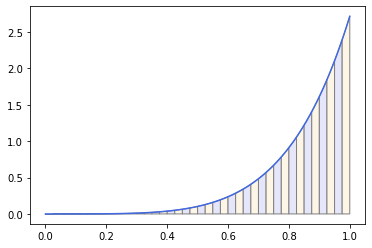

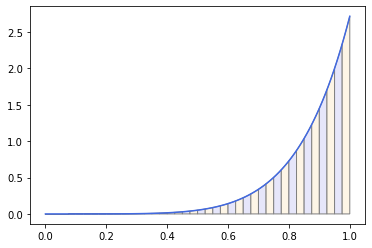

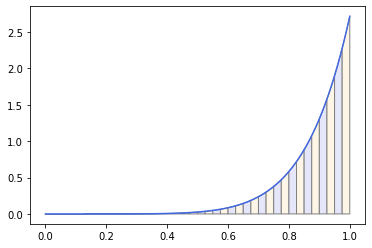

In [9]:
# Exercicio 6
f = lambda x, a: x**a * np.exp(x)

for a in range(7):
    f0 = lambda x: f(x, a)
    i = integrar_precision(f0, 0, 1, 1e-5, integrar_simpson_comp, representar_integral_simpson, step=4)
    print("a = {}, i = {:.5f}".format(a, i))
    print("a = {}, r = {:.5f}".format(a, integral_recurrencia(np.e - 1, 0, a)))

In [12]:
import time

def integrar_precision_prueba1(f, a, b, p, f_int, n=1, step=10):
    i0 = f_int(f, a, b, n)
    i1 = f_int(f, a, b, n+1)
    if (abs(i0 - i1) > p):
        return integrar_precision_prueba1(f, a, b, p, f_int, n=n*step)
    return i0

def integrar_precision_prueba2(f, a, b, p, i, f_int, n=1):
    i0 = f_int(f, a, b, n)
    if (abs(i0 - i) > p):
        return integrar_precision_prueba2(f, a, b, p, i0, f_int, n=n+1)
    return i0

def integrar_precision_prueba3(f, a, b, p, i, f_int, n=1):
    i0 = f_int(f, a, b, n)
    if (abs(i0 - i) > p):
        return integrar_precision_prueba3(f, a, b, p, i0, f_int, n=n*2)
    return i0

def timer(f, *args):
    t = time.time()
    f(*args)
    print("{:f} seconds".format(time.time() - t))

In [13]:
f = lambda x: x**3 - 3*x**2 - x + 3
a, b = 0, 1.35

print("Consecutivo *10")
for p in (1e-2, 1e-5, 1e-8, 1e-10):
    timer(integrar_precision_prueba1, f, a, b, p, integrar_trapecio)

print("Consecutivo *4")
for p in (1e-2, 1e-5, 1e-8, 1e-10):
    timer(integrar_precision_prueba1, f, a, b, p, integrar_trapecio, 1, 4)

print("Consecutivo *2")
for p in (1e-2, 1e-5, 1e-8, 1e-10):
    timer(integrar_precision_prueba1, f, a, b, p, integrar_trapecio, 1, 2)

print("Valor anterior +1")
for p in (1e-2, 1e-5, 1e-8, 1e-10):
    timer(integrar_precision_prueba2, f, a, b, p, 0, integrar_trapecio)

print("Valor anterior *2")
for p in (1e-2, 1e-5, 1e-8, 1e-10):
    timer(integrar_precision_prueba3, f, a, b, p, 0, integrar_trapecio)

Consecutivo *10
0.000841 seconds
0.001901 seconds
0.008595 seconds
0.107055 seconds
Consecutivo *4
0.000403 seconds
0.003679 seconds
0.033427 seconds
0.027299 seconds
Consecutivo *2
0.000559 seconds
0.001764 seconds
0.015504 seconds
0.016269 seconds
Valor anterior +1
0.000425 seconds
0.007257 seconds
0.344979 seconds
6.162754 seconds
Valor anterior *2
0.000463 seconds
0.003659 seconds
0.103565 seconds
0.829096 seconds
